In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import glob
from matplotlib.mlab import csd,psd

In [4]:
def plot_tf(step,met,c="b"):
    #figure(figsize(12,10))
    cp=csd(setp,met,2048,Fs=8000)
    pp=psd(setp,2048,Fs=8000)
   
    subplot(311)
    plot(cp[1],20*log10(abs(cp[0]/pp[0])),c)
    xlim(0,1000)
    ylim(-35,5)
    xlabel("Frequency")
    ylabel("Gain in dB")
    grid()
    subplot(312)
    plot(cp[1],unwrap(angle(cp[0]/pp[0]))/pi*180,c)
    plot([0,1000],[-180,-180],"r")
    xlim(0,1000)
    ylim(-360,0)
    xlabel("Frequency")
    ylabel("Phase in deg")
    grid()
    subplot(313)
    cc=cohere(setp,met,4000,Fs=8000,color=c)
    xlim(0,1000)
    ylim(0,1.03)
    grid()
    xlabel("Frequency")
    ylabel("Coherence")

In [5]:
def plot_tfl(name,c="b"):
    data=loadtxt(name,comments="%")
    #figure(figsize(12,10))
    subplot(311)
    plot(data[:,0],data[:,1],c)
    xlim(0,1000)
    ylim(-35,5)
    xlabel("Frequency")
    ylabel("Gain in dB")
    grid()
    subplot(312)
    plot(data[:,0],unwrap(data[:,2]/180*pi)*180/pi,c)
    plot([0,1000],[-180,-180],"r")
    xlim(0,1000)
    ylim(-360,0)
    xlabel("Frequency")
    ylabel("Phase in deg")
    grid()
    subplot(313)
    plot(data[:,0],data[:,3]/100.,c)
    xlim(0,1000)
    ylim(0,1.03)
    grid()
    xlabel("Frequency")
    ylabel("Coherence")


#Introduction

The control loop of the DDL piezos is an at least 2 level system. There is the high level control loop done at the LCU level and there is the local control loop done at the level of the piezo themselves that uses strain gauges for measure the position.

In order to keep the DDL system as identical as possible to the previous iteration the only freedom is the tuning of the local control loop of the piezos.

One of the issue is the tracability of what had been done during the first iteration (my fault :o() I am not sure exactly of what was done last time. 

In particular I think I do not have a transfer function curve for the Piezos alone. Thus I do not know to what to tend.

This local control loop is controled by 3.5 parameters :

* The Gain of the local servo control
* The Integration term of the local servo control
![control loop](scheme_control_loop.png)
* The depth of the notch filter
![damping](damping.png)
* The frequency of the notch filter ( this is however set by the first visible resonant frequency )

The first visible peak seen on lddl6 (which will be unless stated tho on which the teste were made so far)




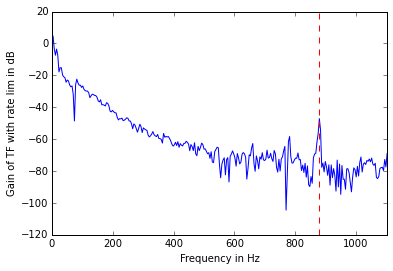

In [6]:
lst=glob.glob("*transfer*.out")
len(lst)
lst[0]
setp=array([])
met=array([])
for f in lst:
    d=loadtxt(f)
    if d[:,3].mean()< 5:
        setp=r_[setp,d[:,4].T]
        met=r_[met,d[:,3].T]

figure(figsize(6,4))        
cp=csd(setp,met,2048,Fs=8000)
pp=psd(setp,2048,Fs=8000)
clf()
plot(cp[1],20*log10(abs(cp[0]/pp[0])))
xlim(0,1100)
plot([878.5,878.5],[-120,20],"r--")
xlabel("Frequency in Hz")
ylabel("Gain of TF with rate lim in dB")

The first notable peak of resonance is at 879 Hz and seems not too different from what was set on the previous ddl

# Initial state

This measurement was performed on the lddl8 and represent the orignial states of the piezo bandwidth

In [7]:
lst=glob.glob("sans_rate_limiter_lddl8_avant_reglage/*transfer*.out")
len(lst)
lst[0]
setp=array([])
met=array([])
for f in lst:
    d=loadtxt(f)
    if d[:,3].mean()< 5:
        setp=r_[setp,d[:,4].T]
        met=r_[met,d[:,3].T]

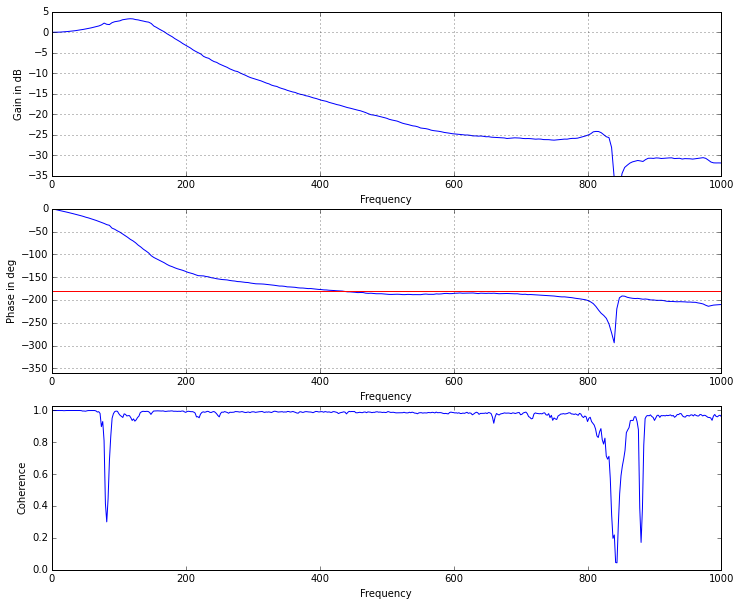

In [8]:
figure(figsize(12,10))
plot_tf(step,met)

#Target
Here is the current complete loop transfer function

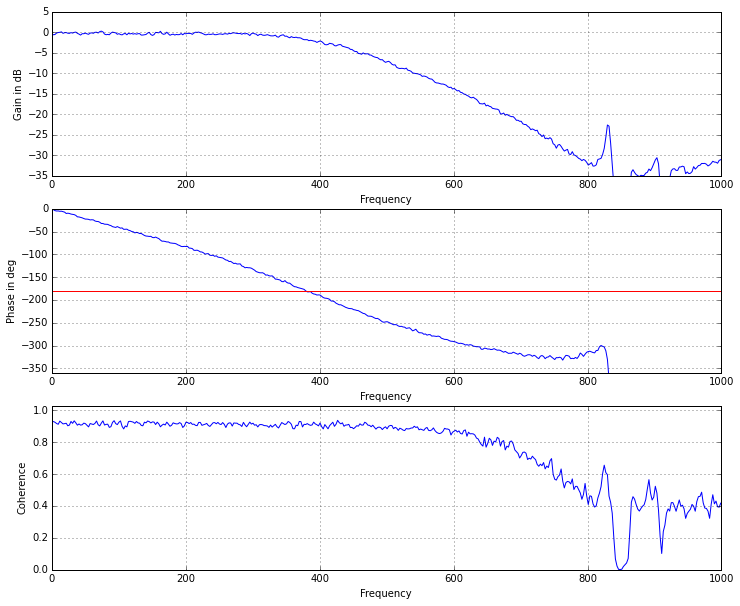

In [9]:
figure(figsize(12,10))
plot_tfl("../../prima/mesures_ddl/transfer_function/version_chili/ddl3.tfl")

#Initial TF after Piezo Tuning

The first step of the tuning is the following. I could spot a resonant frequency around 879 Hz. I tuned the notch filter of the piezo system in order to kill this frequency.

Then there is still a choice of the depth of the notch filter.  In the first step I set the notch filter to be low (meaning the damping state where no number is stated by the PI servo control manual (see above))

I have then tuned the P and I term of the piezo servo control to have the stiffest tuning possible. I could get the follwing curve for the piezos alone.

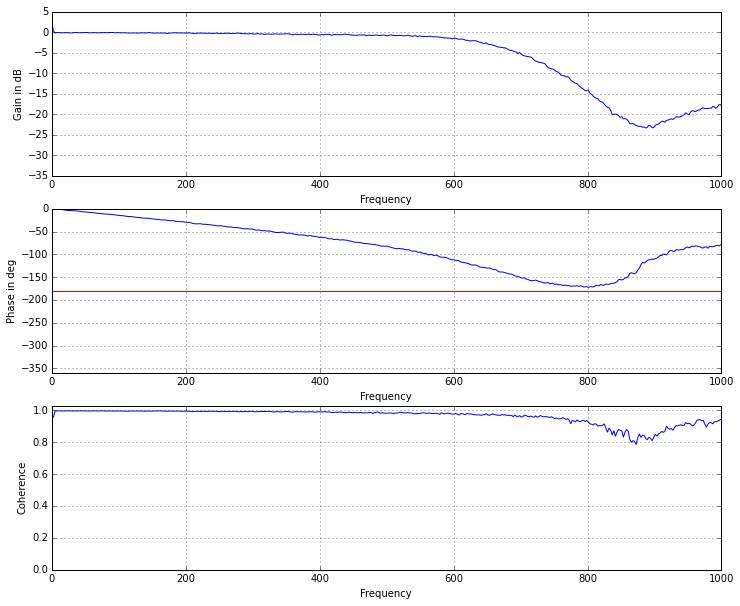

In [10]:
figure(figsize(12,10))
plot_tfl("DDL++/mesure_reglage_1_2_ddl6.tfl")

Then in the main closed loop I get the folowing curve :

In [11]:
lst=glob.glob("sans_rate_limiter/*transfer*.out")
len(lst)
lst[0]

'sans_rate_limiter/ddltestTacCloseloopControl_lddl6_transfer_20150616.091602.out'

In [12]:
setp=array([])
met=array([])
for f in lst:
    d=loadtxt(f)
    if d[:,3].mean()< 5:
        setp=r_[setp,d[:,4].T]
        met=r_[met,d[:,3].T]

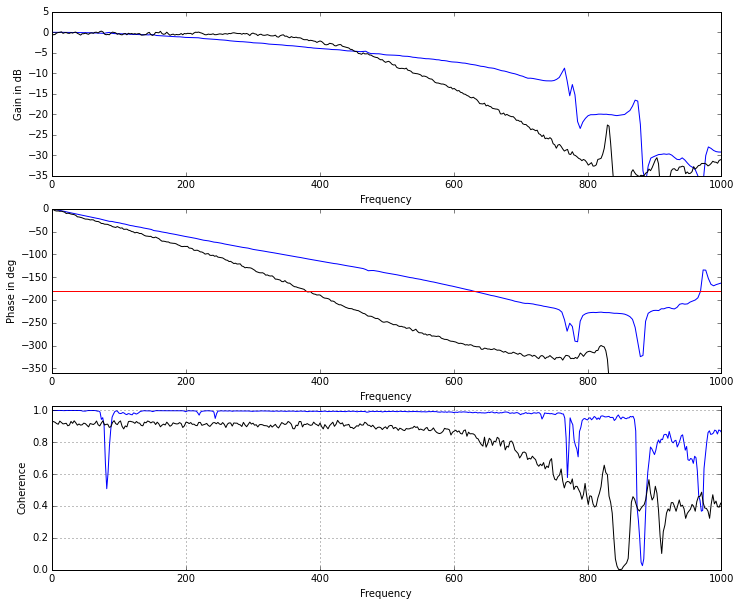

In [13]:
figure(figsize(12,10))
plot_tf(step,met)
plot_tfl("../../prima/mesures_ddl/transfer_function/version_chili/ddl3.tfl","k")

Then I changed the damping factor because it seamt different on the old DDL. I think in the Old DDL the tuning of this damping is at the maximum 25 db so I tried that

# Changing the Damping factor


In [20]:
data=loadtxt("reglage_lddl6/ddltestTacCloseloopControl_lddl6_transfer_20150622.121831.out")

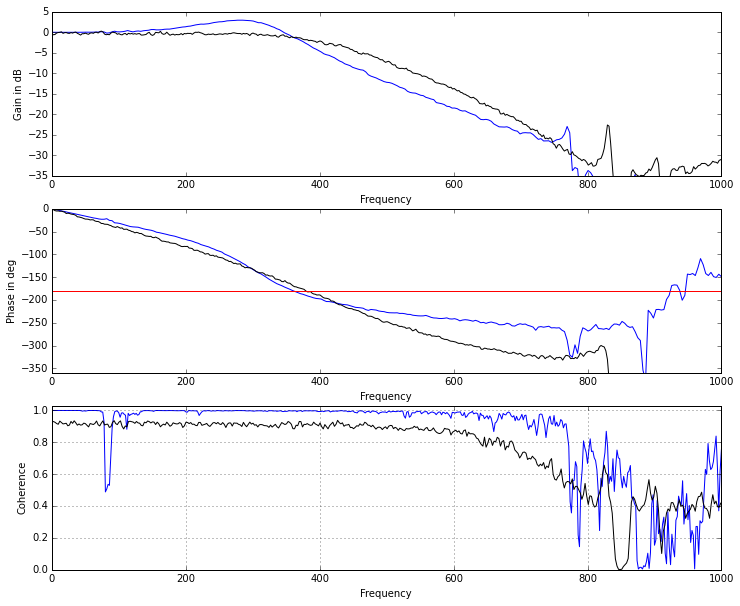

In [24]:
setp=array([])
met=array([])
setp=r_[setp,data[:,4].T]
met=r_[met,data[:,3].T]

figure(figsize(12,10))
plot_tf(setp,met)
plot_tfl("../../prima/mesures_ddl/transfer_function/version_chili/ddl3.tfl","k")

from this point on I tried to tune the P and I of the piezod to bring the the TF back to what we want, but I was out of luck. I could not understand the relative effects of the 2 tunings and never managed to get something reasonable.  

First I managed to push the resonant frequency a bit pushing the gain :

In [25]:
data=loadtxt("reglage_lddl6/ddltestTacCloseloopControl_lddl6_transfer_20150622.124353.out")

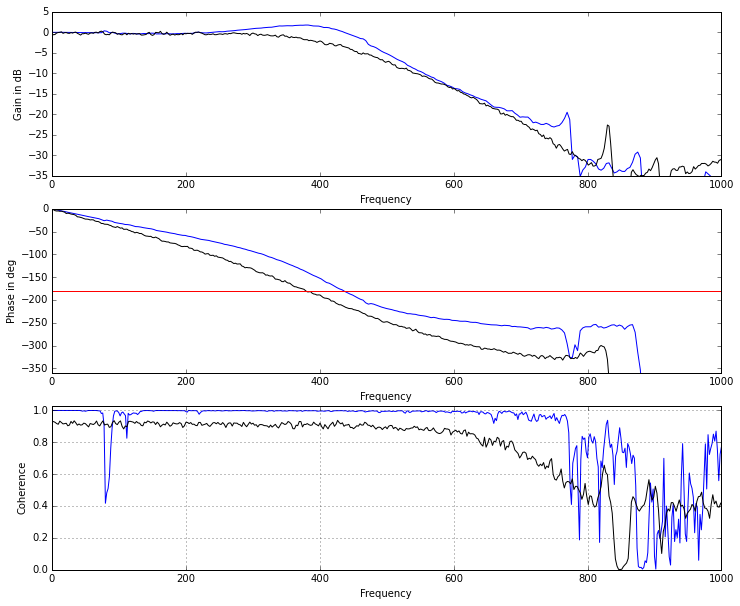

In [26]:
setp=array([])
met=array([])
setp=r_[setp,data[:,4].T]
met=r_[met,data[:,3].T]

figure(figsize(12,10))
plot_tf(setp,met)
plot_tfl("../../prima/mesures_ddl/transfer_function/version_chili/ddl3.tfl","k")

But I did not manage to get rid of the bump, playing on the I term. If I increase it I lower the bump frequency again

In [27]:
data=loadtxt("reglage_lddl6/ddltestTacCloseloopControl_lddl6_transfer_20150622.125819.out")

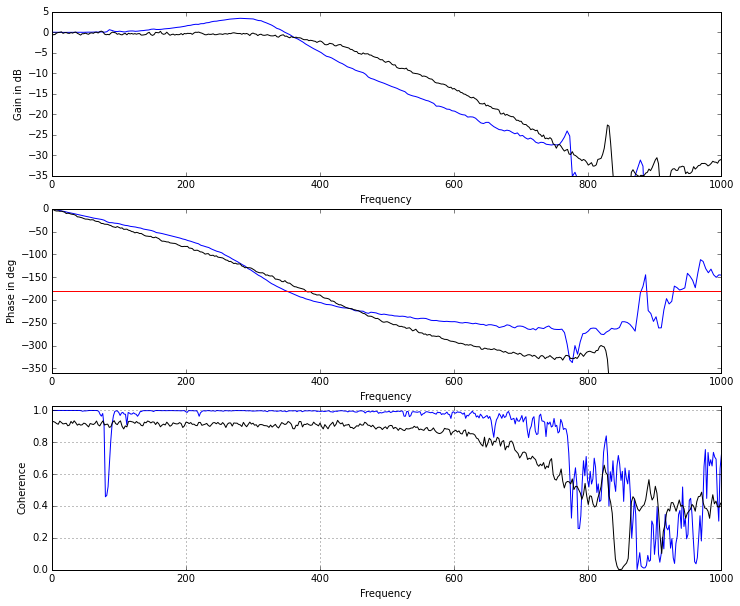

In [29]:
setp=array([])
met=array([])
setp=r_[setp,data[:,4].T]
met=r_[met,data[:,3].T]

figure(figsize(12,10))
plot_tf(setp,met)
plot_tfl("../../prima/mesures_ddl/transfer_function/version_chili/ddl3.tfl","k")

I then tried a bit blindly but did not find how to go back to the same tuning as we had in chile